In [1]:
import roboticstoolbox as rtb
import fr3
import spatialmath as sm
from swift import Swift
import numpy as np
import spatialgeometry as sg

In [4]:
import importlib
importlib.reload(fr3)

<module 'fr3' from '/home/mirinae/Desktop/amm-jenga-play/fr3.py'>

In [2]:
robot=fr3.fr3()
print(robot)

ERobot: fr3, 7 joints (RRRRRRR), 1 gripper, 9 branches, dynamics, geometry, collision
┌─────┬──────────────┬───────┬───────────┬────────────────────────────────────────────────┐
│link │     link     │ joint │  parent   │              ETS: parent to link               │
├─────┼──────────────┼───────┼───────────┼────────────────────────────────────────────────┤
│   0 │ fr3_link0    │       │ BASE      │ SE3()                                          │
│   1 │ fr3_link0_sc │       │ fr3_link0 │ SE3()                                          │
│   2 │ fr3_link1    │     0 │ fr3_link0 │ SE3(0, 0, 0.333) ⊕ Rz(q0)                      │
│   3 │ fr3_link1_sc │       │ fr3_link1 │ SE3()                                          │
│   4 │ fr3_link2    │     1 │ fr3_link1 │ SE3(-90°, -0°, 0°) ⊕ Rz(q1)                    │
│   5 │ fr3_link2_sc │       │ fr3_link2 │ SE3()                                          │
│   6 │ fr3_link3    │     2 │ fr3_link2 │ SE3(0, -0.316, 0; 90°, -0°, 0°) ⊕ Rz(q2)   

In [3]:
for i in range(len(robot.links)):
    print(robot.links[i])


Link("fr3_link0")
Link("fr3_link0_sc", SE3(), parent="fr3_link0")
Link("fr3_link1", SE3(0, 0, 0.333) ⊕ Rz(q), parent="fr3_link0", qlim=[-2.31, 2.31], m=0, r=[0, 0, 0], I=[0, 0, 0, 0, 0, 0], Jm=0, B=0, Tc=[0, 0], G=0)
Link("fr3_link1_sc", SE3(), parent="fr3_link1")
Link("fr3_link2", SE3(-90°, -0°, 0°) ⊕ Rz(q), parent="fr3_link1", qlim=[-1.51, 1.51], m=0, r=[0, 0, 0], I=[0, 0, 0, 0, 0, 0], Jm=0, B=0, Tc=[0, 0], G=0)
Link("fr3_link2_sc", SE3(), parent="fr3_link2")
Link("fr3_link3", SE3(0, -0.316, 0; 90°, -0°, 0°) ⊕ Rz(q), parent="fr3_link2", qlim=[-2.49, 2.49], m=0, r=[0, 0, 0], I=[0, 0, 0, 0, 0, 0], Jm=0, B=0, Tc=[0, 0], G=0)
Link("fr3_link3_sc", SE3(), parent="fr3_link3")
Link("fr3_link4", SE3(0.0825, 0, 0; 90°, -0°, 0°) ⊕ Rz(q), parent="fr3_link3", qlim=[-2.75, -0.446], m=0, r=[0, 0, 0], I=[0, 0, 0, 0, 0, 0], Jm=0, B=0, Tc=[0, 0], G=0)
Link("fr3_link4_sc", SE3(), parent="fr3_link4")
Link("fr3_link5", SE3(-0.0825, 0.384, 0; -90°, -0°, 0°) ⊕ Rz(q), parent="fr3_link4", qlim=[-2.48, 2.48],

In [7]:
import inspect
print(inspect.getmembers(robot,lambda x:not inspect.isroutine(x)))

[('_SceneNode__T', array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])), ('_SceneNode__scene', <capsule object "Node" at 0x7f6f9efc50c0>), ('_SceneNode__wT', array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])), ('_SceneNode__wq', array([0., 0., 0., 1.])), ('_T', array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])), ('_T_reference', array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])), ('__abstractmethods__', frozenset()), ('__class__', <class 'fr3.fr3'>), ('__delattr__', <method-wrapper '__delattr__' of fr3 object at 0x7f70205ba8b0>), ('__dict__', {'_SceneNode__wT': array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]]), '_SceneNode__wq': array([0., 0., 0., 1.]), '_SceneNode__T': array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1.

In [8]:
Te=robot.fkine(robot.qr,start=robot.links[0],end=robot.grippers[0])
print(Te)

   0.7036   -0.7036    0.09983   0.484     
  -0.7071   -0.7071    0         0         
   0.07059  -0.07059  -0.995     0.4126    
   0         0         0         1         



In [9]:
Tep=sm.SE3.Trans(.6,-.3,.1)*sm.SE3.OA([0,1,0],[0,0,-1])
sol=robot.ik_LM(Tep)
print(sol)

(array([-1.00261987,  0.78140709,  0.62368114, -1.69647759, -0.57645591,
        2.2865268 , -2.48336122]), 1, 94, 5, 1.9530930741671807e-10)


# IMPORTANT(solved)
There is a problem, after solve inverse kinematics it has DoF of only 4

In [10]:
q_pickup=sol[0]
print(robot.fkine(q_pickup,start=robot.links[0],end=robot.grippers[0]))

  -0.7071    0.7071    3.382e-06  0.6       
   0.7071    0.7071    1.223e-05 -0.3       
   6.255e-06  1.104e-05 -1         0.1       
   0         0         0         1         



In [11]:
from PIL import Image

## Hand not rendered
- gripper configuration issue
- python file needs review

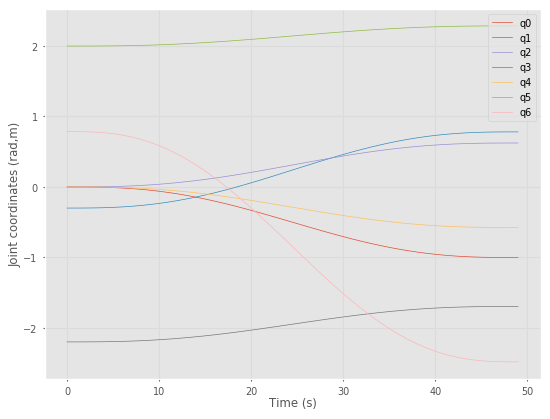

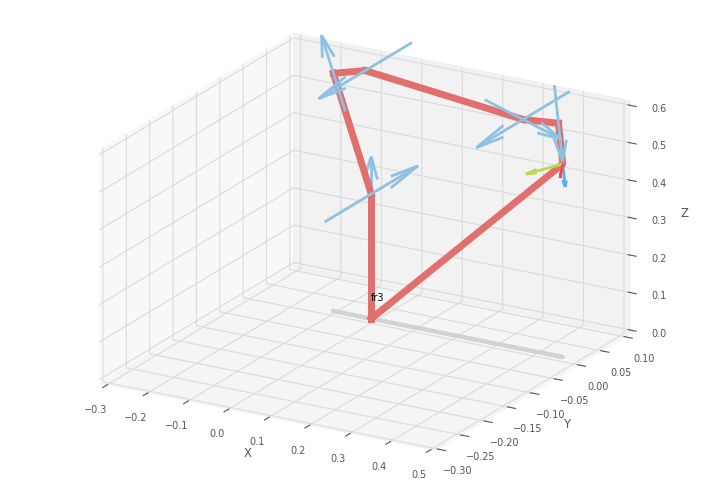

PyPlot3D backend, t = 2.499999999999999, scene:
  robot: Text(0.001674682452694476, -0.022134074277046258, 'fr3')

<Figure size 640x480 with 0 Axes>

In [18]:
qt=rtb.jtraj(robot.qr,q_pickup,50)
rtb.tools.plot.xplot(qt.q)
robot.plot(qt.q,backend='pyplot',movie='fr3.gif',limits=[-.3,.5,-.3,.1,0,.6])

In [19]:
loop=False
loop=True
robot.plot(qt.q,backend='swift',loop=loop)

connection handler failed
Traceback (most recent call last):
  File "/home/mirinae/.local/lib/python3.8/site-packages/websockets/legacy/server.py", line 240, in handler
    await self.ws_handler(self)
  File "/home/mirinae/.local/lib/python3.8/site-packages/websockets/legacy/server.py", line 1186, in _ws_handler
    return await cast(
  File "/home/mirinae/.local/lib/python3.8/site-packages/swift/SwiftRoute.py", line 320, in serve
    await self.expect_message(websocket, expected)
  File "/home/mirinae/.local/lib/python3.8/site-packages/swift/SwiftRoute.py", line 325, in expect_message
    recieved = await websocket.recv()
  File "/home/mirinae/.local/lib/python3.8/site-packages/websockets/legacy/protocol.py", line 568, in recv
    await self.ensure_open()
  File "/home/mirinae/.local/lib/python3.8/site-packages/websockets/legacy/protocol.py", line 944, in ensure_open
    raise self.connection_closed_exc()
websockets.exceptions.ConnectionClosedOK: received 1001 (going away); then sent 

KeyboardInterrupt: 

In [5]:
import importlib
importlib.reload(fr3)
robot=fr3.fr3()



env=Swift()
env.launch(realtime=True)
env.add(robot)

ee_axes=sg.Axes(.1)
eee_axes=sg.Axes(.1)
goal_axes=sg.Axes(.1)
env.add(ee_axes)
env.add(goal_axes)
robot.q=robot.qr
env.step(0)
Tep=sm.SE3.Trans(.3,0,.5)*sm.SE3.RPY(0,-np.pi,0)
goal_axes.T=Tep
arrived=False
while not arrived:
    J=robot.jacob0(robot.q)
    Te=robot.fkine(robot.q,start=robot.links[0],end=robot.grippers[0]).A
    J_pinv=np.linalg.pinv(J)
    ev,arrived=rtb.p_servo(Te,Tep,threshold=0.001,method='angle-axis')
    robot.qd=J_pinv@ev
    ee_axes.T=Te
    env.step(0.05)



Gripper("fr3_hand_tcp", connected to fr3_hand, 0 joints, 1 links)
   1         0         0         0         
   0         1         0         0         
   0         0         1         0         
   0         0         0         1         



ValueError: incorrect vector length: expected 9, got (7,)